In [1]:
from ucimlrepo import fetch_ucirepo 
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# Split into X and Y
X = cdc_diabetes_health_indicators.data.features 
Y = cdc_diabetes_health_indicators.data.targets 
Y = pd.DataFrame(Y.to_numpy().reshape(len(Y)))

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X, Y)
X = pd.DataFrame(scaled, columns=X.columns)


In [2]:
X = X.to_numpy()
Y = Y.to_numpy().reshape(len(Y))

In [3]:
from sklearn.model_selection import train_test_split
# Y is a 2D array and needs to reshaped to a 1D array
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

## Logistic Regression with CV of 10

In [5]:
from sklearn.linear_model import LogisticRegressionCV
lr_model = LogisticRegressionCV(cv=10, max_iter=1000)
lr_model.fit(X_train, Y_train)
lr_Y_pred = lr_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.98      0.92     65452
           1       0.53      0.14      0.23     10652

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.57     76104
weighted avg       0.83      0.86      0.83     76104



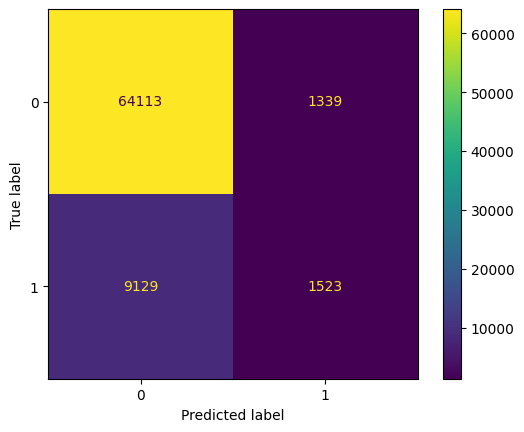

In [6]:
print(classification_report(Y_test, lr_Y_pred))
lr_conf = confusion_matrix(Y_test, lr_Y_pred, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(lr_conf, display_labels=lr_model.classes_)
disp.plot()
plt.show()

## Support Vector Classifier with CV of 10

In [7]:
%%script false
# %%script false blocks jupyter from running this cell. This is because of how long it takes and the headaches associated with  
from sklearn.svm import SVC
# parameters = [
#     {
#         "C": [0.01, 0.1, 1, 2],
#         "gamma": [0.001, 0.01, 0.1, "auto"],   
#         "degree": [2, 3],
#         "kernel": ["poly"]
#     },
#     {
#         "C": [0.01, 0.1, 1, 2],
#         "gamma": [0.001, 0.01, 0.1, "auto"],
#         "kernel": ["rbf"],
#     }
# ]
# svc_gscv = GridSearchCV(SVC(kernel="rbf"), param_grid={}, cv=5)

svc = SVC(kernel="rbf")
svc_scores = cross_val_score(svc, X, Y, cv=10)
print(f"CV Scores: {svc_scores}")
print(f"Avg Score: {round(svc_scores.mean(), 5)}")


svc.fit(X_train, Y_train)
# print(f"Best Parameters: {svc_gscv.best_params_}")
svc_Y_pred = svc.predict(X_test)

Couldn't find program: 'false'


In [8]:
%%script false
print(classification_report(Y_test, svc_Y_pred))
svc_conf = confusion_matrix(Y_test, svc_Y_pred, labels=svc.classes_)
disp = ConfusionMatrixDisplay(svc_conf, display_labels=svc.classes_)
disp.plot()
plt.show()

Couldn't find program: 'false'


## Naive Bayes with CV of 10

In [9]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes_scores = cross_val_score(naive_bayes, X, Y, cv=10)

print(f"CV Scores: {naive_bayes_scores}")
print(f"Avg Score: {round(naive_bayes_scores.mean(), 5)}")
naive_bayes.fit(X_train, Y_train)
nb_Y_pred = naive_bayes.predict(X_test)

CV Scores: [0.77179912 0.78181173 0.77786976 0.7559918  0.78248187 0.78260013
 0.77140492 0.76060391 0.78248187 0.76659571]
Avg Score: 0.77336


              precision    recall  f1-score   support

           0       0.92      0.81      0.86     65452
           1       0.33      0.57      0.41     10652

    accuracy                           0.77     76104
   macro avg       0.62      0.69      0.64     76104
weighted avg       0.84      0.77      0.80     76104



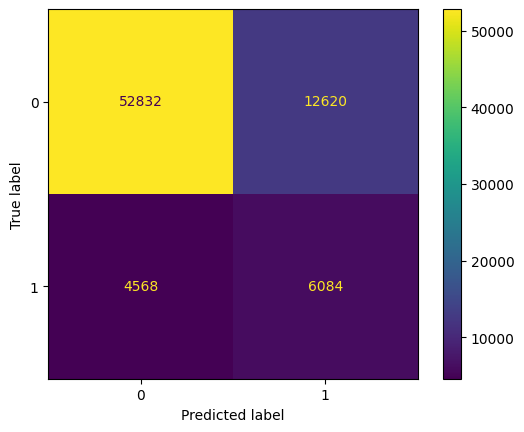

In [10]:
print(classification_report(Y_test, nb_Y_pred))
naive_bayes_conf = confusion_matrix(Y_test, nb_Y_pred, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(naive_bayes_conf, display_labels=naive_bayes.classes_)
disp.plot()
plt.show()

## Decision Trees with CV of 10

In [11]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree_scores = cross_val_score(decision_tree, X, Y, cv=10)
print(f"CV Scores: {decision_tree_scores}")
print(f"Avg Score: {decision_tree_scores.mean()}")

decision_tree.fit(X_train, Y_train)
dt_Y_pred = decision_tree.predict(X_test)

CV Scores: [0.79793441 0.80420214 0.79296752 0.78717282 0.80294071 0.79505676
 0.79529328 0.79391359 0.80124566 0.79091769]
Avg Score: 0.7961644591611479


              precision    recall  f1-score   support

           0       0.89      0.87      0.88     65452
           1       0.29      0.32      0.31     10652

    accuracy                           0.79     76104
   macro avg       0.59      0.60      0.59     76104
weighted avg       0.80      0.79      0.80     76104



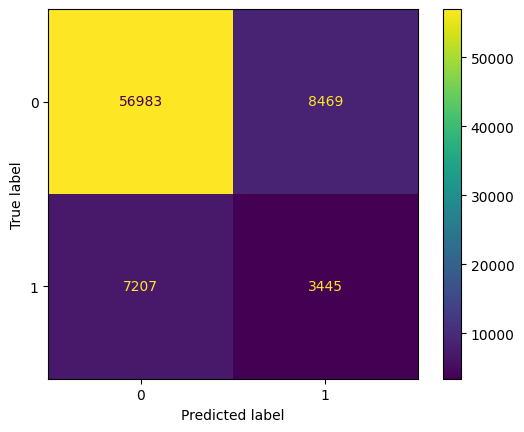

In [12]:
print(classification_report(Y_test, dt_Y_pred))
dt_conf = confusion_matrix(Y_test, dt_Y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(dt_conf, display_labels=decision_tree.classes_)
disp.plot()
plt.show()

## Ensemble Classifier - Random Forest with CV of 10

In [13]:

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=11)
random_forest_scores = cross_val_score(random_forest, X, Y, cv=10)
print(f"CV Scores: {random_forest_scores}")
print(f"Avg Score: {random_forest_scores.mean()}")

random_forest.fit(X_train, Y_train)
rf_Y_pred = random_forest.predict(X_test)

CV Scores: [0.85237307 0.85209713 0.84957427 0.84709082 0.85071744 0.85052034
 0.85095396 0.84929833 0.85316146 0.84886471]
Avg Score: 0.8504651529485967


              precision    recall  f1-score   support

           0       0.88      0.95      0.92     65452
           1       0.42      0.21      0.28     10652

    accuracy                           0.85     76104
   macro avg       0.65      0.58      0.60     76104
weighted avg       0.82      0.85      0.83     76104



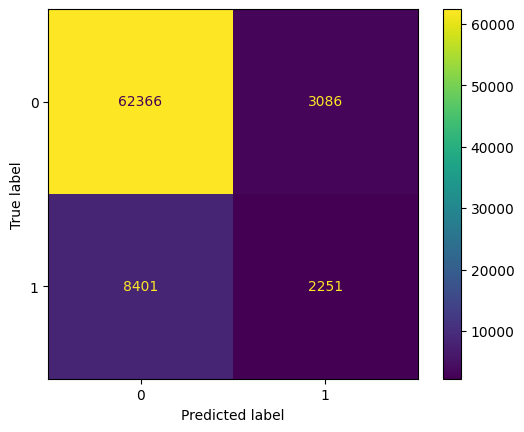

In [14]:
print(classification_report(Y_test, rf_Y_pred))
rf_conf = confusion_matrix(Y_test, rf_Y_pred, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(rf_conf, display_labels=random_forest.classes_)
disp.plot()
plt.show()

## Ensamble Classifier - Adaboost with CV of 10

In [15]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=100, algorithm="SAMME")
adaboost_scores = cross_val_score(adaboost, X, Y, cv=10)
print(f"CV Scores: {adaboost_scores}")
print(f"Avg Score: {adaboost_scores.mean()}")

adaboost.fit(X_train, Y_train)
ada_Y_pred = adaboost.predict(X_test)

CV Scores: [0.86573636 0.86616998 0.86577578 0.86195207 0.86482971 0.86451435
 0.86479029 0.86360769 0.86451435 0.86415957]
Avg Score: 0.8646050141911068


              precision    recall  f1-score   support

           0       0.88      0.97      0.92     65452
           1       0.54      0.18      0.27     10652

    accuracy                           0.86     76104
   macro avg       0.71      0.58      0.60     76104
weighted avg       0.83      0.86      0.83     76104



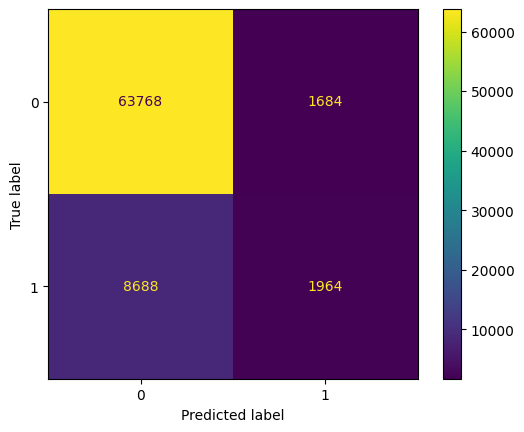

In [16]:
print(classification_report(Y_test, ada_Y_pred))
ada_conf = confusion_matrix(Y_test, ada_Y_pred, labels=adaboost.classes_)
disp = ConfusionMatrixDisplay(ada_conf, display_labels=adaboost.classes_)
disp.plot()
plt.show()

## LVQ Learning Vector Quantization 

In [28]:
from LVQ import LVQ1
lvq = LVQ1(200, 1.0)
lvq.fit(X_train, Y_train)
lvq_Y_pred = lvq.predict(X_test) 
print("")

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     65452
           1       0.25      0.76      0.37     10652

    accuracy                           0.64     76104
   macro avg       0.59      0.69      0.56     76104
weighted avg       0.84      0.64      0.70     76104



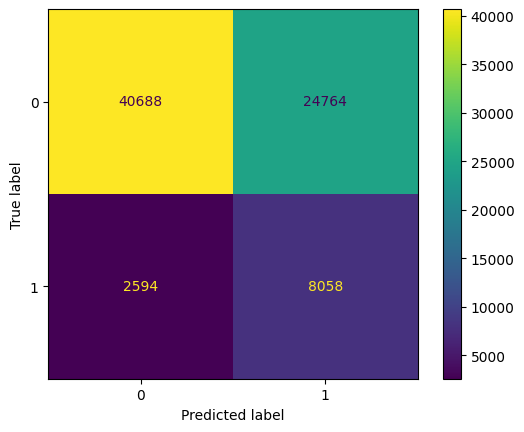

In [29]:
print(classification_report(Y_test, lvq_Y_pred))
lvq_conf = confusion_matrix(Y_test, lvq_Y_pred)
disp = ConfusionMatrixDisplay(lvq_conf)
disp.plot()
plt.show()

## Results

In [30]:
%%html
# Makes the dataframe larger
<style>
.dataframe th {
    font-size: 20px;
}
.dataframe td {
    font-size: 18px;
}
</style>

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
results_df = pd.DataFrame(columns=columns)
# model_preds = [("Logistic Regression", lr_Y_pred), ("Naive Bayes", nb_Y_pred), ("Decision Tree", dt_Y_pred), ("Random Forest", rf_Y_pred), ("Adaboost", ada_Y_pred), ("LVQ", lvq_Y_pred)]
model_preds = [("Logistic Regression", lr_Y_pred), ("SVC", []), ("Naive Bayes", nb_Y_pred), ("Decision Tree", dt_Y_pred), ("Random Forest", rf_Y_pred), ("Adaboost", ada_Y_pred), ("LVQ", lvq_Y_pred)]
for name, pred in model_preds:
    if name == "SVC":
        results_df.loc[len(results_df)] = [name, np.nan, np.nan, np.nan, np.nan]
        continue 
    results_df.loc[len(results_df)] = [name, accuracy_score(Y_test, pred), precision_score(Y_test, pred, zero_division=np.nan), recall_score(Y_test, pred), f1_score(Y_test, pred)]

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.862451,0.532145,0.142978,0.225396
1,SVC,NaN,NaN,NaN,NaN
2,Naive Bayes,0.774151,0.325278,0.571160,0.414498
3,Decision Tree,0.794019,0.289156,0.323413,0.305327
4,Random Forest,0.849062,0.421773,0.211322,0.281569
5,Adaboost,0.863713,0.538377,0.184379,0.274685
6,LVQ,0.640518,0.245506,0.756478,0.370704


## Reflection

### Key take aways
- Need to utilized SMOTE to improve class distribution.  
    - False (Class 0) was over represented in the dataset
- Would like to hyper-paramaterize the SVM on a subset of the data.
    - Then train and test for CV on full data
- Unprepared for LVQ. 
    - Current libraries didn’t work and several implementations had limitations
    - Multiple different models of LVQ with subtle differences
- Project burned me out.

### Personal Thoughts
I was impressed at how SVC was unable to handle this large of a dataset. Even after several days of hyper-parameterizing, it still failed to train and complete.

This project was the largest time devoted to a ML project that I had worked on. I realized several shortcommings of this project and how I set about accomplishing it but I'm still statified with the knowledge I had gained from it.
